In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.interpolate import LinearNDInterpolator

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200


plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [3]:
masses = np.arange(8, 21) # Msun
mass_range = np.linspace(np.min(masses), np.max(masses), int(1e3))

couplings = [ -10, -9, -8, -8.5 ]

age_range = np.linspace(0, 50, 100) # in Mya

colormap_m = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(masses), np.max(masses)),
    plt.get_cmap(f'winter')
)

colormap_g = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(couplings), np.max(couplings)),
    plt.get_cmap(f'winter')
)

colormap_age = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(age_range), np.max(age_range)),
    plt.get_cmap(f'winter')
)

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]


labels = list(({
    # 'model': 'slice',
    'm': 'mass (Msun)',
    # 'coupling': 'coupling',
    'age': 'age (years)',
    # 'til': 'time to core O depletion (years)',
    # 'dt': 'dt (years)',
    
    # 'm_enc': 'mass enclosed (Msun)',
    # 'dm': 'dm (g)',
    # 'r': 'r (Rsun)',
    # 'dr': 'dr (cm)',
    # 'T': 'T (K)',
    # 'T_core': 'core T (K)',
    'T_eff': 'effective T (K)',
    # 'log_T': 'log T',
    
    # 'eps_grav': 'eps_grav (ergs/g s)',
    # 'eps_nuc': 'eps_nuc (ergs/g s)', 
    # 'eps_non_nuc_neu': 'eps_neu (ergs/g s)',
    # 'eps_a': 'eps_a (ergs/g s)',
    
    # 'lum_gamma': 'lum_gamma (ergs/s)',
    # 'lum_neu': 'lum_neu (ergs/s)',
    # 'lum_a': 'lum_a (ergs/s)',
    
    'lum_gamma_surf': 'surface lum_gamma (ergs/s)',
    # 'lum_neu_surf': 'surface lum_neu (ergs/s)',
    # 'lum_a_surf': 'surface lum_a (ergs/s)',
    
    # 'cum_e_gamma': 'cumulative e_gamma (ergs)',
    # 'cum_e_neu': 'cumulative e_neu (ergs)',
    # 'cum_e_a': 'cumulative e_a (ergs)',
}).values())

lumSun = 3.846e33 # ergs/s

# crank this up for full thing
max_slices = 10000

In [4]:
datatable = dict()

for g in couplings:
    datatable[g] = dict()
    for m in masses:
        try:
            key = f'm{m:04.1f}_g{g:+04.2f}'
            run = pd.read_csv(f'csv/{key}/index.csv')
            entry = run[labels].to_numpy()[:max_slices].T
            datatable[g][m] = entry
            print(key, end=',\t')
        except FileNotFoundError as e:
            print(e)

m08.0_g-10.00,	m09.0_g-10.00,	m10.0_g-10.00,	m11.0_g-10.00,	m12.0_g-10.00,	m13.0_g-10.00,	m14.0_g-10.00,	m15.0_g-10.00,	m16.0_g-10.00,	m17.0_g-10.00,	m18.0_g-10.00,	m19.0_g-10.00,	m20.0_g-10.00,	m08.0_g-9.00,	m09.0_g-9.00,	m10.0_g-9.00,	m11.0_g-9.00,	m12.0_g-9.00,	m13.0_g-9.00,	m14.0_g-9.00,	m15.0_g-9.00,	m16.0_g-9.00,	m17.0_g-9.00,	m18.0_g-9.00,	m19.0_g-9.00,	m20.0_g-9.00,	m08.0_g-8.00,	m09.0_g-8.00,	m10.0_g-8.00,	m11.0_g-8.00,	m12.0_g-8.00,	m13.0_g-8.00,	m14.0_g-8.00,	m15.0_g-8.00,	m16.0_g-8.00,	m17.0_g-8.00,	m18.0_g-8.00,	m19.0_g-8.00,	m20.0_g-8.00,	m08.0_g-8.50,	m09.0_g-8.50,	m10.0_g-8.50,	m11.0_g-8.50,	m12.0_g-8.50,	m13.0_g-8.50,	m14.0_g-8.50,	m15.0_g-8.50,	m16.0_g-8.50,	m17.0_g-8.50,	m18.0_g-8.50,	m19.0_g-8.50,	[Errno 2] No such file or directory: 'csv/m20.0_g-8.50/index.csv'


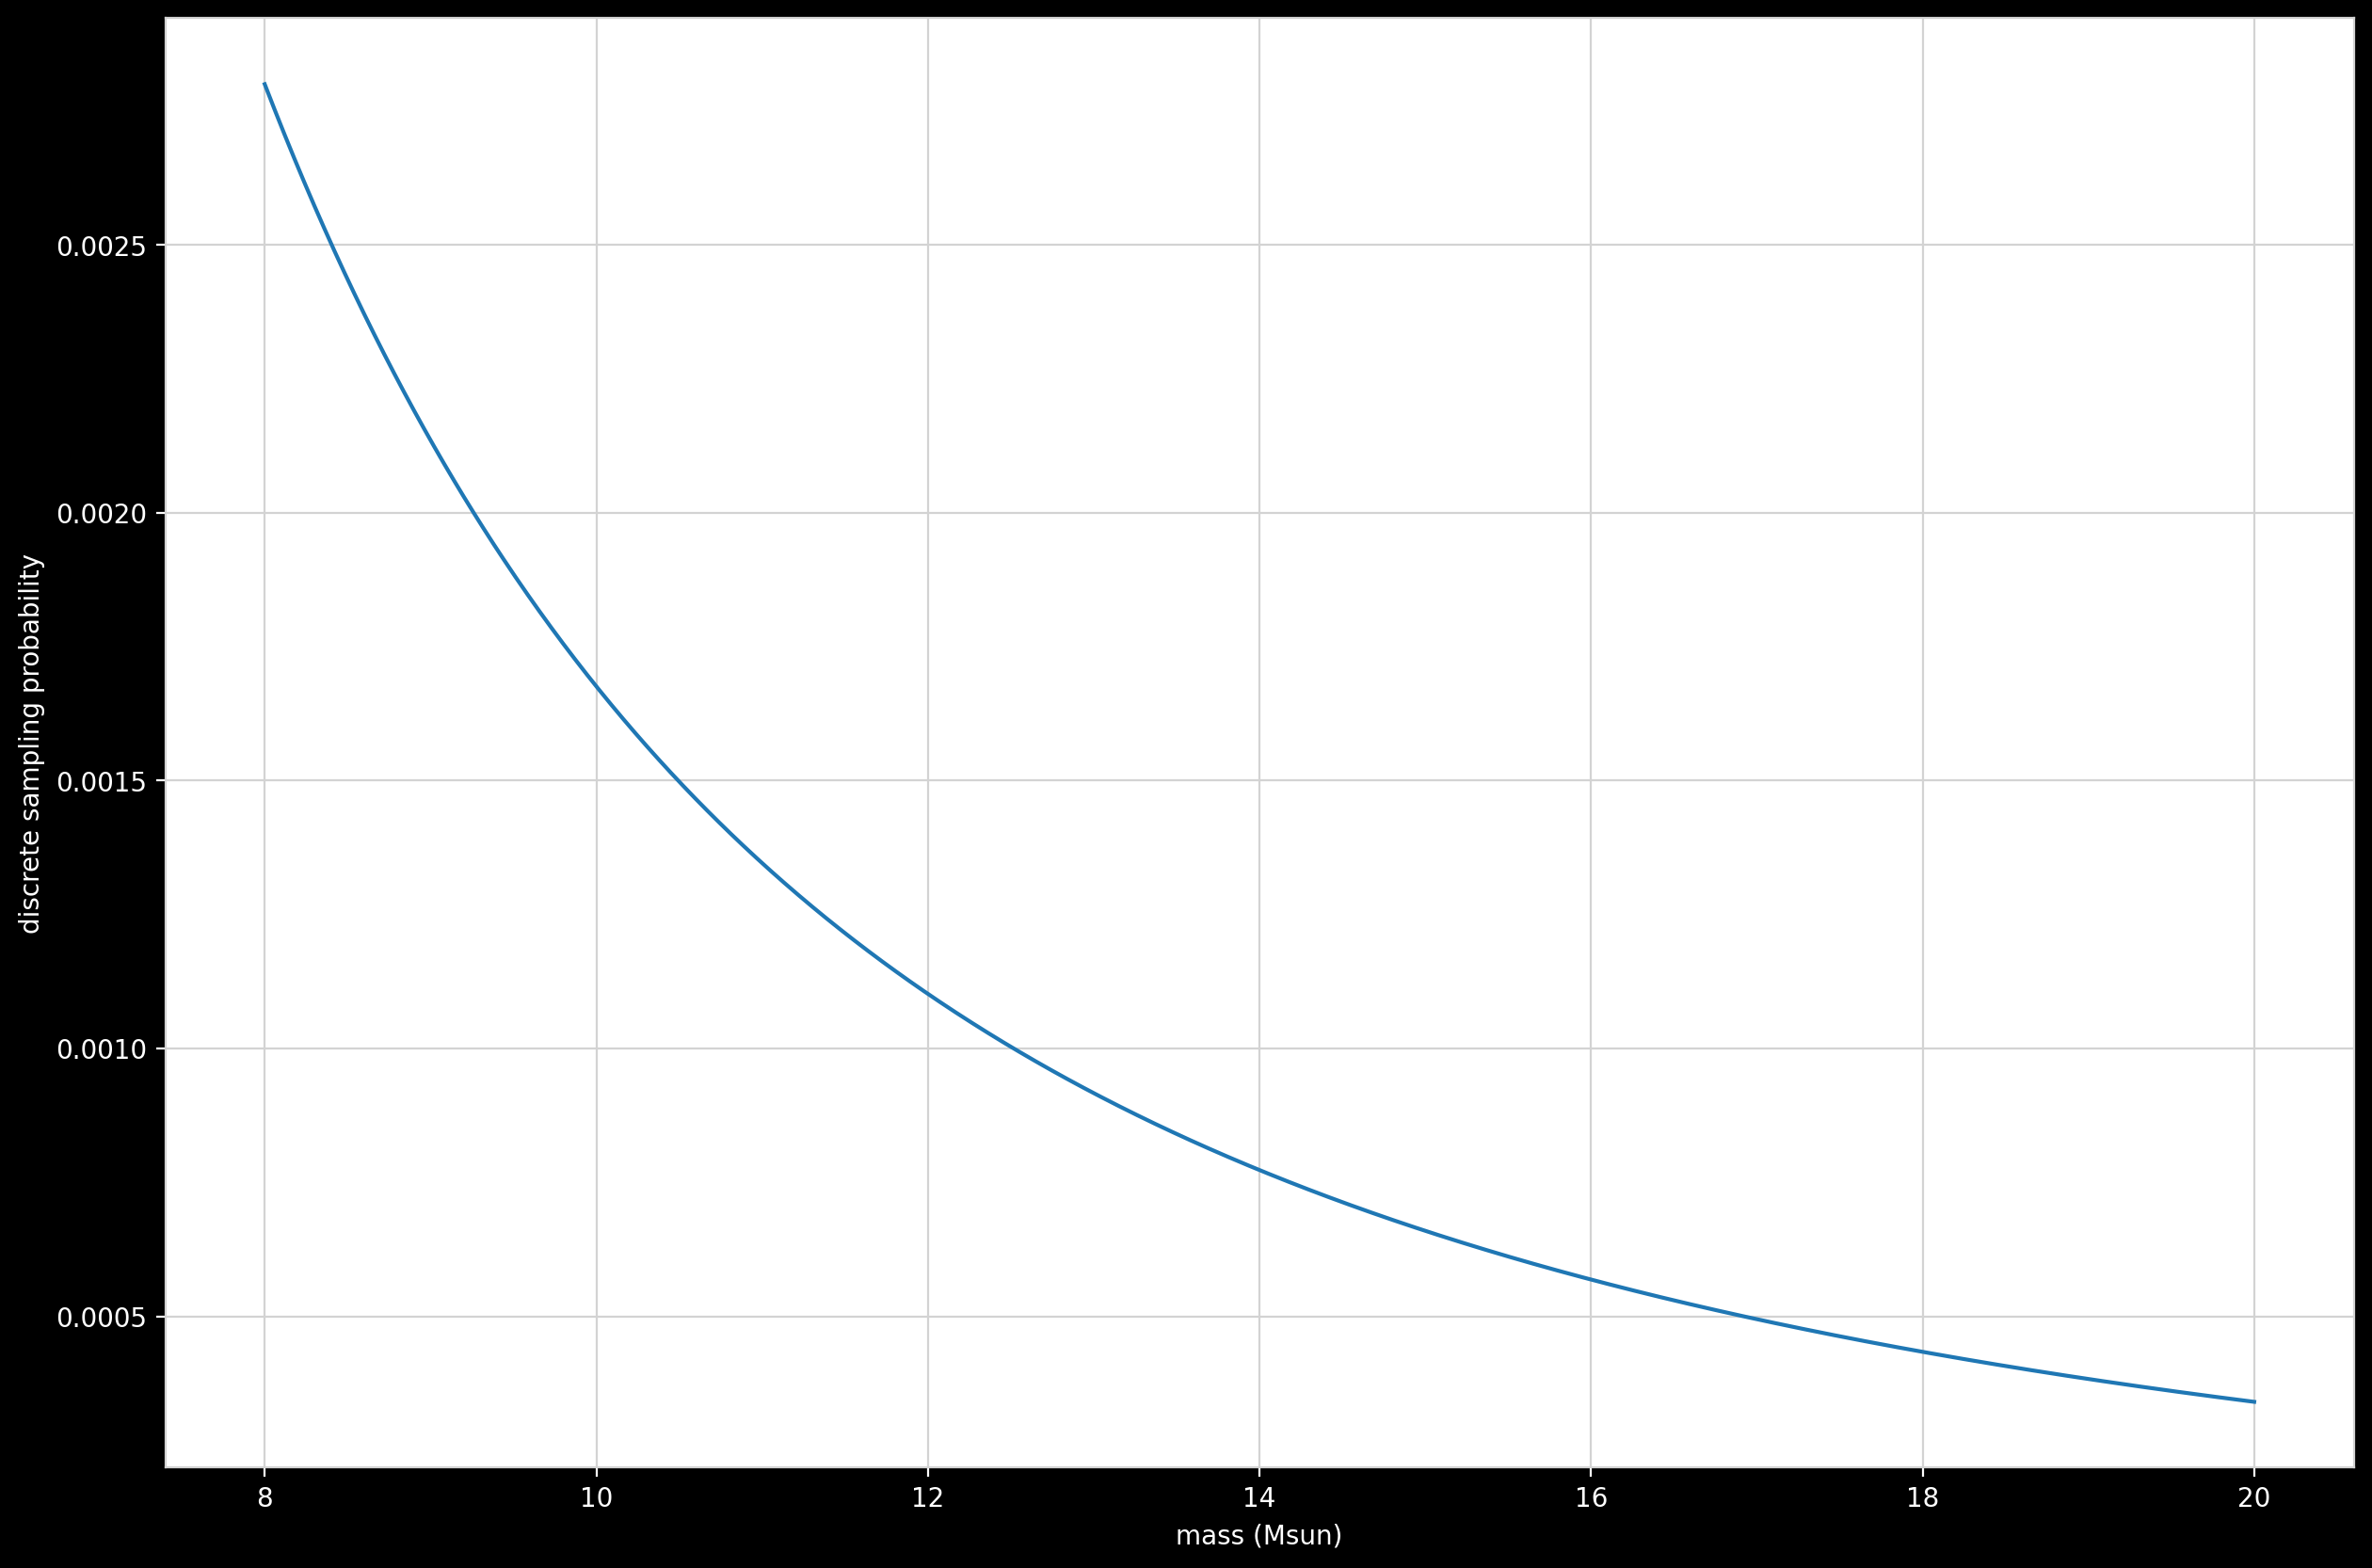

In [10]:
# inverse of initial mass function
imf = lambda m: m**(-2.3)
pdf = imf(mass_range)
pdf /= np.sum(pdf)
plt.plot(mass_range, pdf)
plt.grid()
plt.xlabel('mass (Msun)')
plt.ylabel('discrete sampling probability')
plt.show()

In [11]:
def hr(age, g, N_samples):
    temp = []
    lum = []
    for m in masses:
        entry = datatable[g][m]
        t = np.random.normal(age, scale=1e6, size=int(N_samples*imf(m)))
        temp.append(np.interp(t, entry[1], entry[2], left=0, right=0))
        lum.append(np.interp(t, entry[1], entry[3], left=0, right=0))
    return (np.concatenate(temp), np.concatenate(lum))

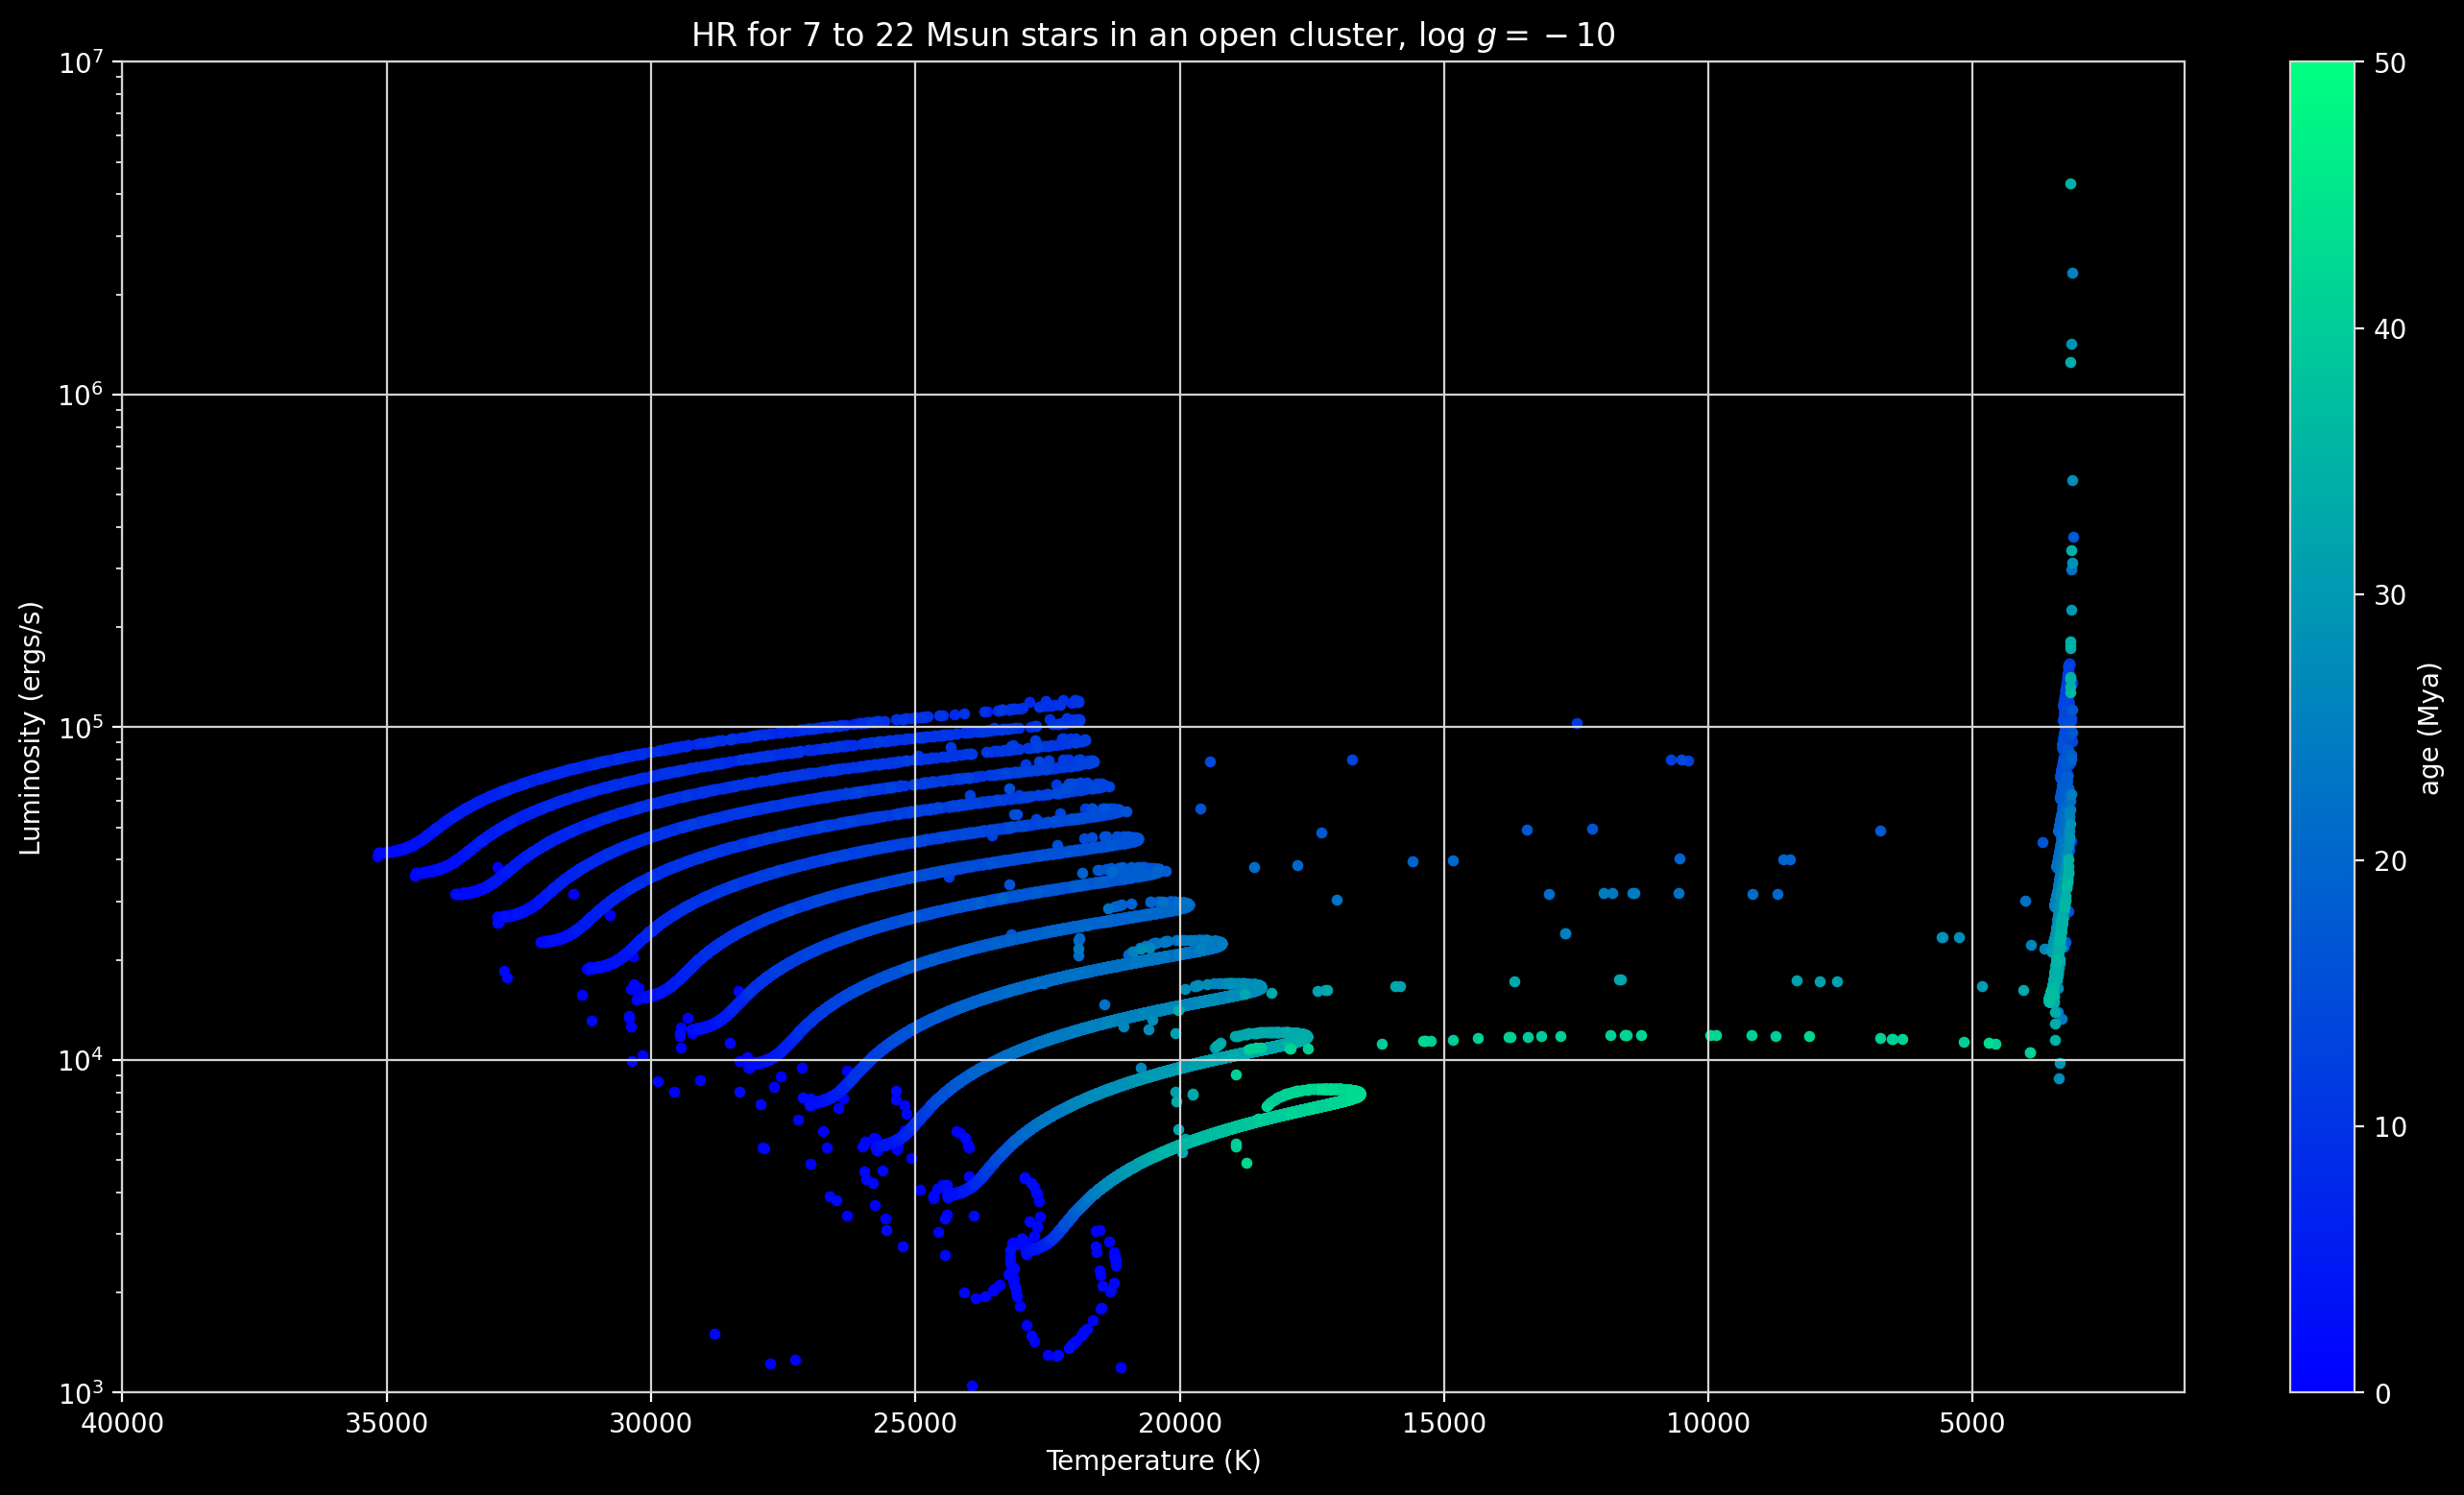

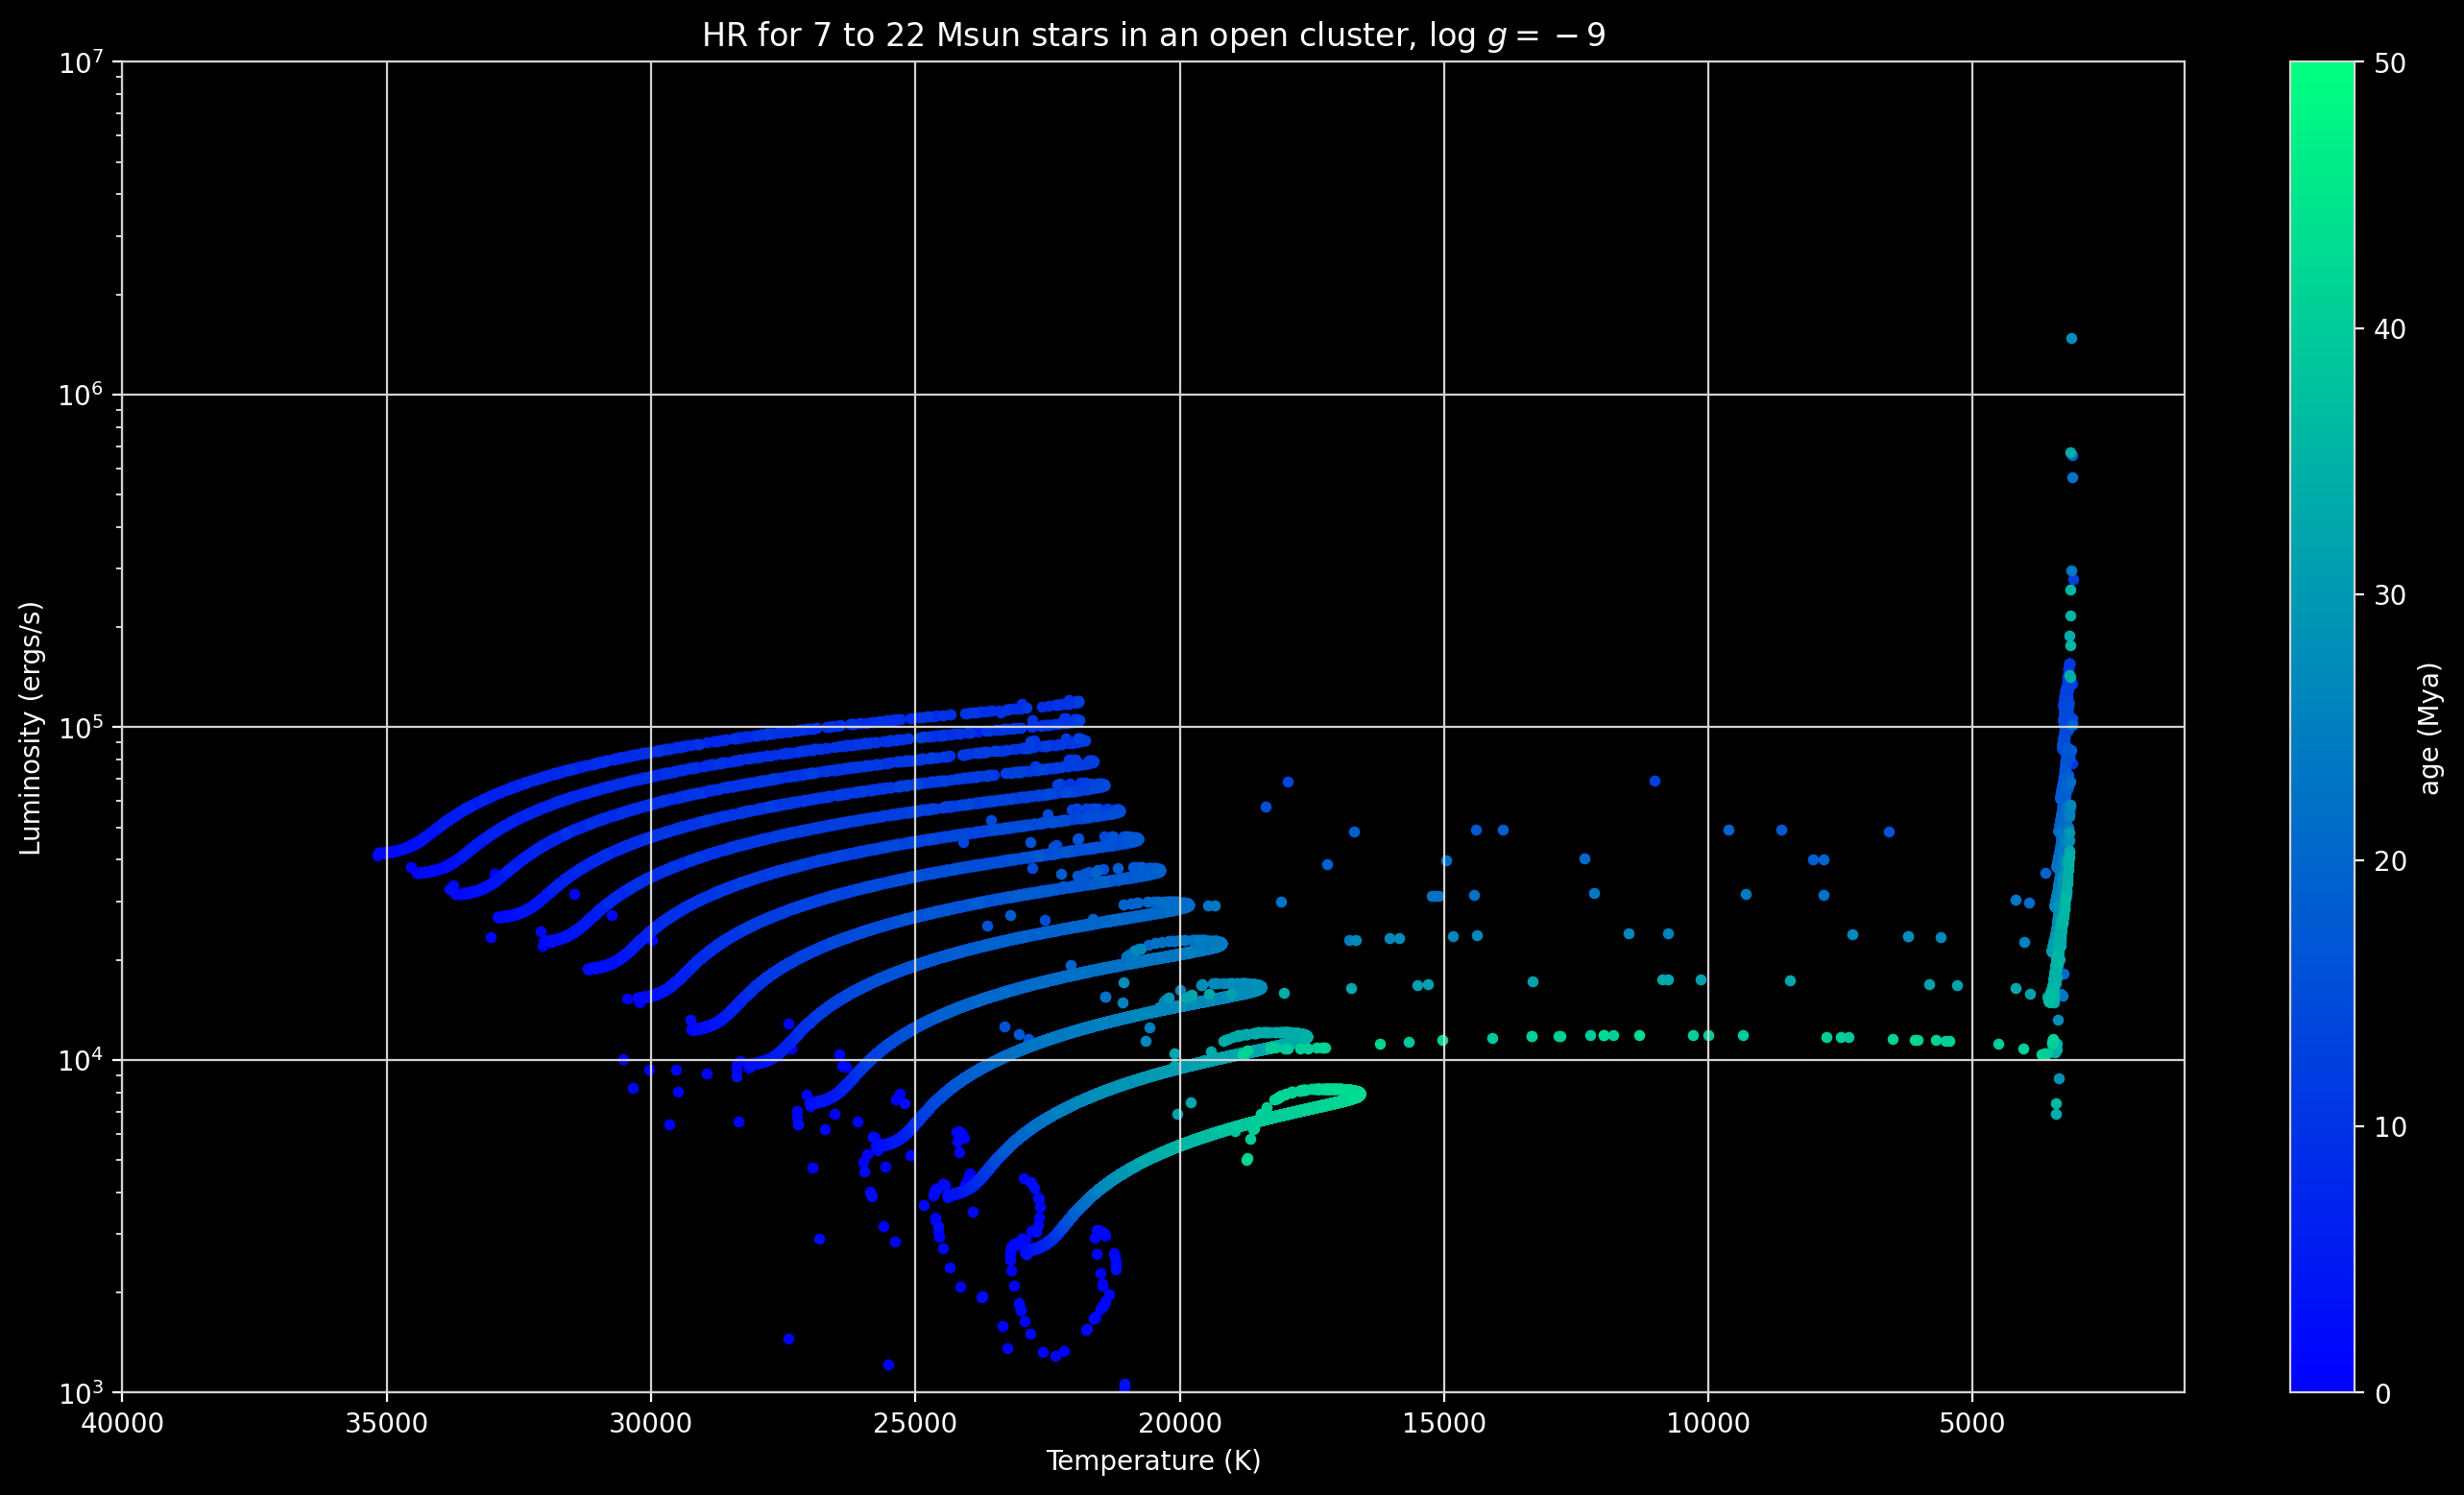

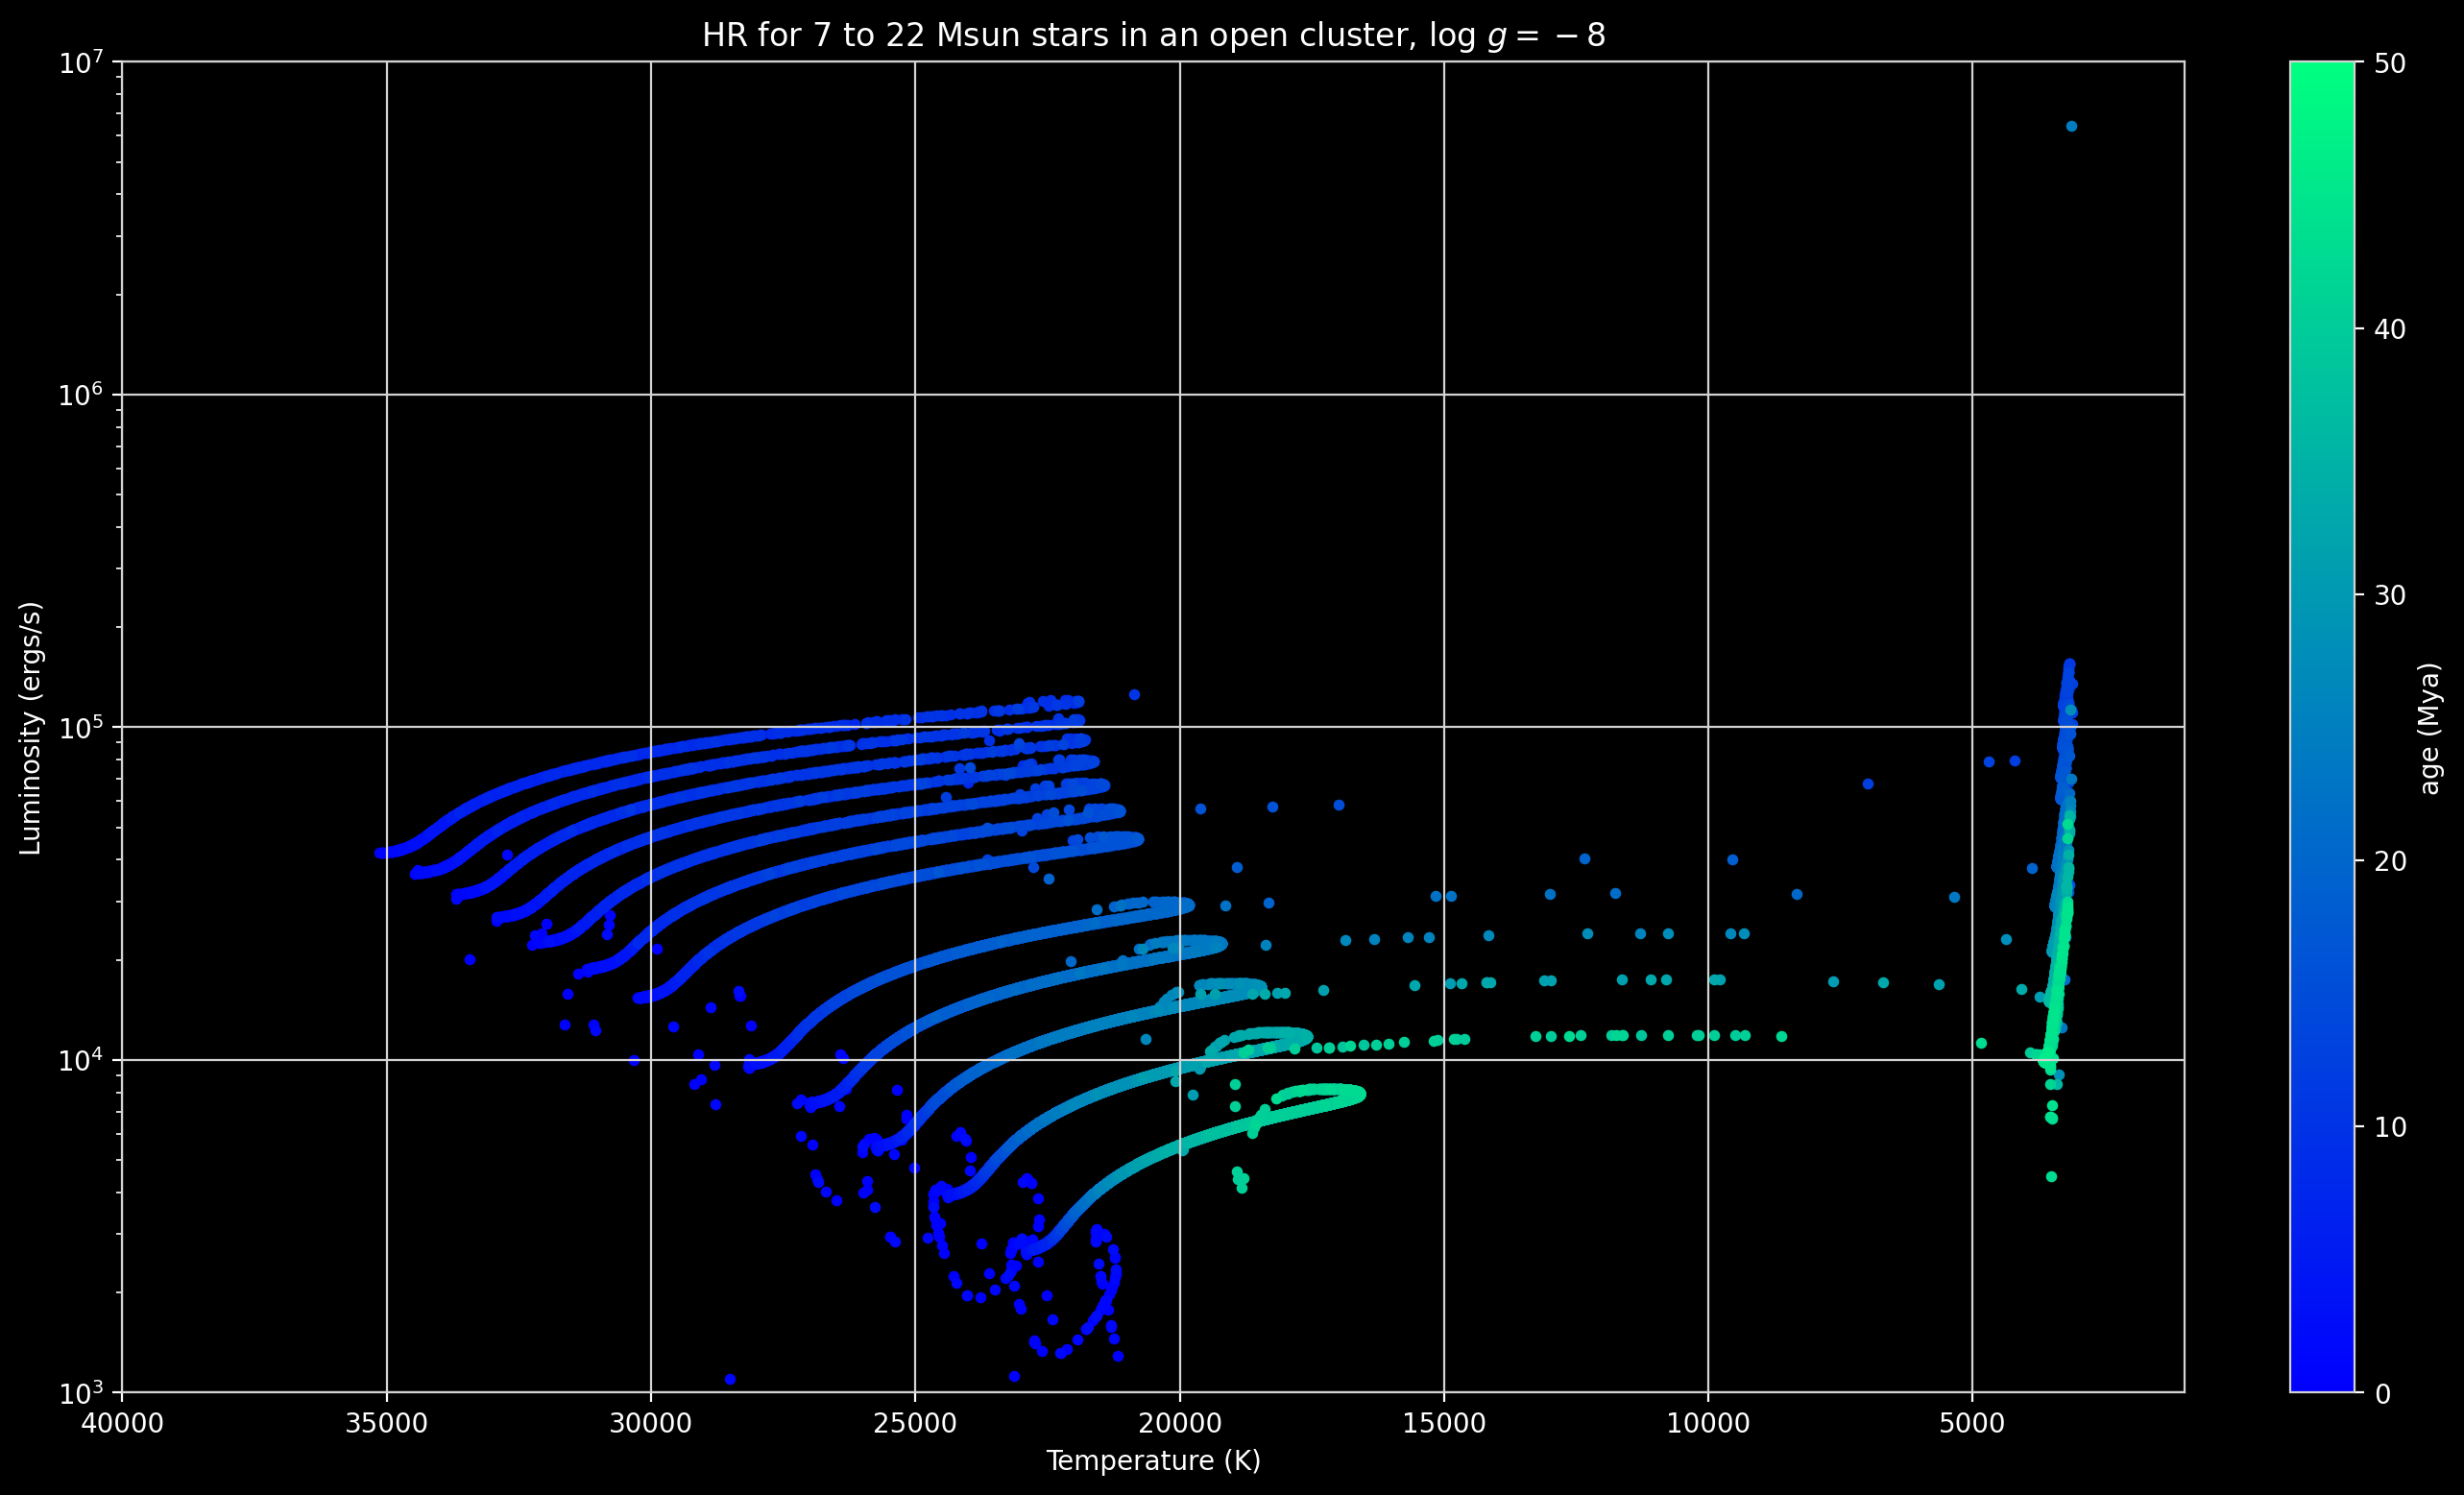

KeyError: 20

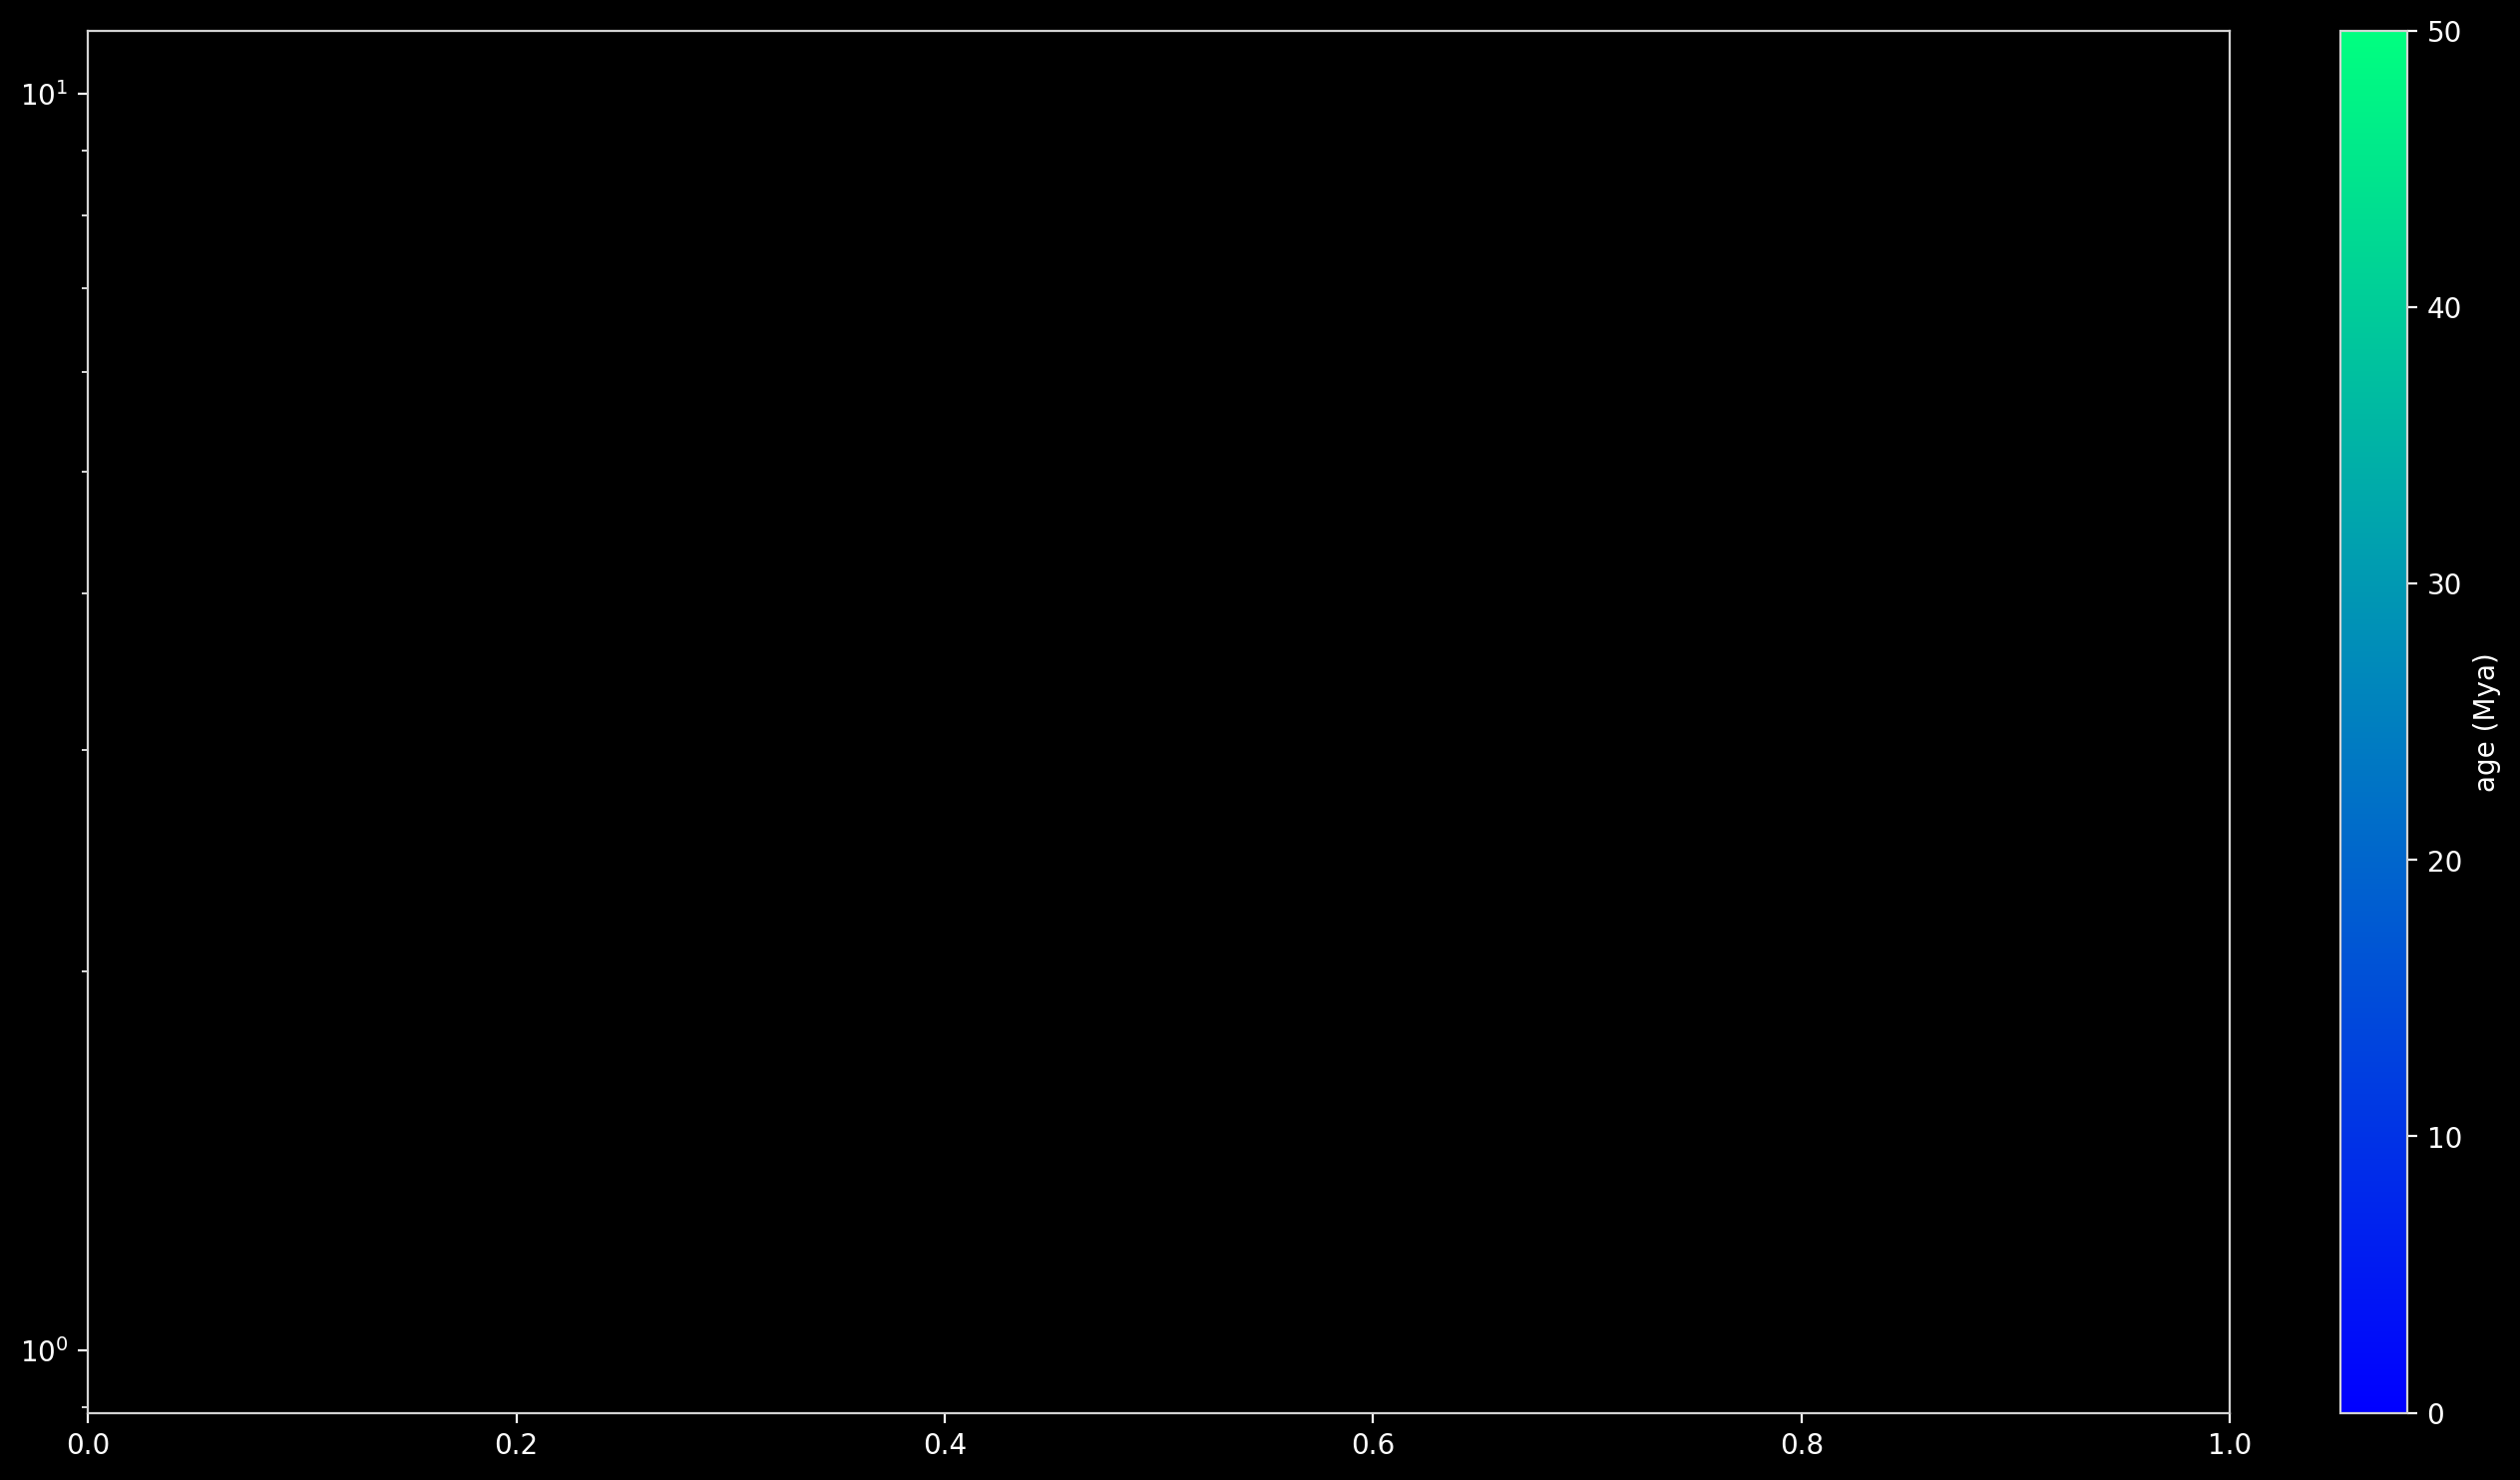

In [12]:
age_range = np.linspace(0, 50, 50) # in Mya

colormap_age = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(age_range), np.max(age_range)),
    plt.get_cmap(f'winter')
)

for g in datatable:
    fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                            gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                           )
    main_ax.set_facecolor('black')
    fig.colorbar(colormap_age, label='age (Mya)', cax=color_ax)
    plt.sca(main_ax)
    main_ax.set_yscale('log')
    # main_ax.set_xscale('log')
    
    for age in age_range:
        (T, lum) = hr(age*1e6, g, int(1e5))
        lum /= lumSun
        plt.scatter(T, lum, s=10, color=colormap_age.to_rgba(age))
    plt.grid()
    
    plt.ylabel('Luminosity (ergs/s)')
    plt.xlabel('Temperature (K)')
    plt.xlim(4e4, 1e3)
    plt.ylim(1e3, 1e7)
    # plt.xlim(3.4e3, 3e3)
    # plt.ylim(1e36, 1e39)
    plt.title(f'HR for 7 to 22 Msun stars in an open cluster, log $g = {g}$', color='white')
    plt.savefig('evol/hr_' + str(g) + '.png')
    
    plt.show()

In [ ]:
fig, main_ax = plt.subplots(ncols=1, figsize=(15, 15),)
main_ax.set_facecolor('black')

age_range = np.linspace(0, 50, 50) # in Mya

for g in datatable:
    HB = []
    MS = []
    RGB = []

    for age in age_range:
        (T, lum) = hr(age*1e6, g, int(1e4))

        MS_select = T > 1e4
        MS.append(np.percentile(T[MS_select], 9.5) if T[MS_select].size else 0)

        RGB_select = T < 1e4
        RGB.append(np.percentile(lum[RGB_select], 95) if lum[RGB_select].size else 0)
    
    HB = np.array(HB)
    MS = np.array(MS)
    RGB = np.array(RGB)
    
    plt.sca(main_ax)
    plt.scatter(age_range, RGB, label=f'$g={g}$')
    
    # plt.sca(turn_ax)
    # plt.plot(age_range, MS, label=f'$g={g}$')

# plt.sca(main_ax)
plt.grid()
plt.legend()
# plt.xlim(3e4, 1.5e4)

# plt.title(f' log $g = {g}$', color='white')
plt.xlabel('Main sequence turn-off temperature (K)')
plt.ylabel('Giant mean luminosity (ergs/s)')
plt.show()